
<div class="container" style="border:1px solid white">
 <h1 style="text-align:center">CIS 380 Data Processing 8</h1>
 <h3 style="text-align:center">Time Series</h3>

<img width="500px" height="300px" src="https://editor.analyticsvidhya.com/uploads/3951420200902_blog_-forecasting-with-time-series-models-using-python_pt2_website.png" style="display:block; margin:auto;">


<br>
</div>


1. Import Libraries: Import necessary libraries like Pandas, NumPy, and statsmodels.
2. Load Data: Load and inspect your time series data.
3. Plot Data: Visualize the time series to understand trends and patterns.
4. Stationarity Check: Use ADF test to check if the series is stationary.
5. Make Stationary: Apply differencing if the series is non-stationary.
6. ACF and PACF: Plot ACF and PACF to determine ARIMA parameters.
7. Fit ARIMA Model: Fit the ARIMA model with chosen parameters.
8. Evaluate Model: Plot actual vs. forecasted values.
9. Print Forecast: Inspect the forecasted values.


<div class="container" style="font-size:14px; padding:10px; border:1px solid green">
<h3 style="color:green;">Please type your name here:</h3>
<br>
<p> Jesse Martinez     </p>

</div>

In [4]:
# 1. Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller



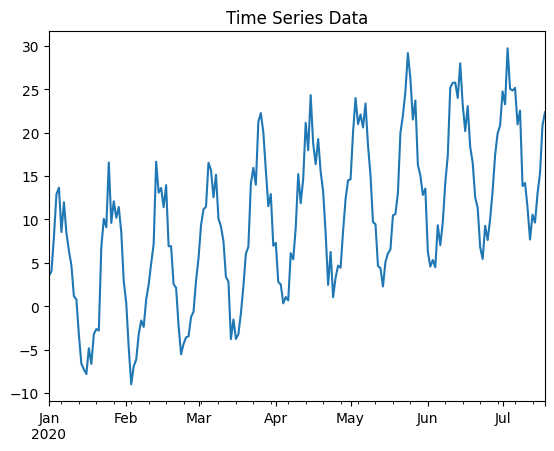

In [5]:
# 2. Load and Inspect the Data

# Create a date range
dates = pd.date_range(start="2020-01-01", periods=200, freq="D")

# Generate synthetic data with trend and seasonality
np.random.seed(0)
trend = np.linspace(0, 20, 200)
seasonal = 10 * np.sin(np.linspace(0, 3.14 * 2 * 10, 200))  # 10 periods of seasonality
noise = np.random.normal(scale=2, size=200)
data = trend + seasonal + noise

# Create a Pandas Series
timeSeries = pd.Series(data, index=dates)

# 3. Plot the synthetic data
timeSeries.plot(title="Time Series Data")

# Show results
plt.show()


In [6]:
# 4. Check for Stationarity

result =adfuller(timeSeries)
print(f"ADF Statistic: {result[0]}")
print(f"p-value:{result[1]}")


# Check stationarity


# Differencing if necessary
if result[1]>0.05:
    timeSeriesDiff=timeSeries.diff().dropna()
else:
    timeSeriesDiff=timeSeries

# Recheck stationarity after differencing

result =adfuller(timeSeriesDiff)
print(f"ADF Statistic (Differenced): {result[0]}")
print(f"p-value(Differenced):{result[1]}")


ADF Statistic: 0.1446721859318549
p-value:0.9689820063791055
ADF Statistic (Differenced): -8.49250658809632
p-value(Differenced):1.3019613709794658e-13


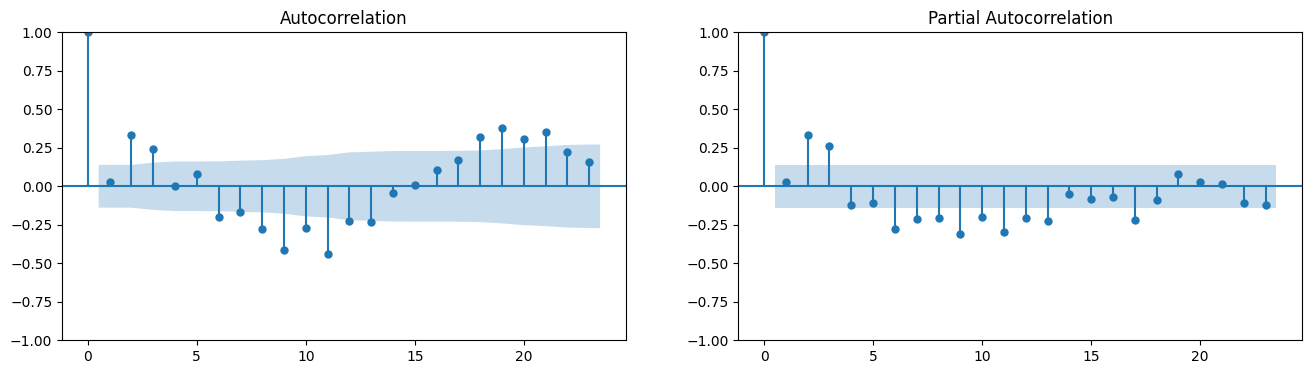

In [7]:
# 6. Plot ACF (identify the patterns) and PACF (identify the direction)

fig, axes=plt.subplots(1, 2, figsize=(16, 4))
plot_acf(timeSeriesDiff, ax=axes[0])
plot_pacf(timeSeriesDiff, ax=axes[1])
plt.show()



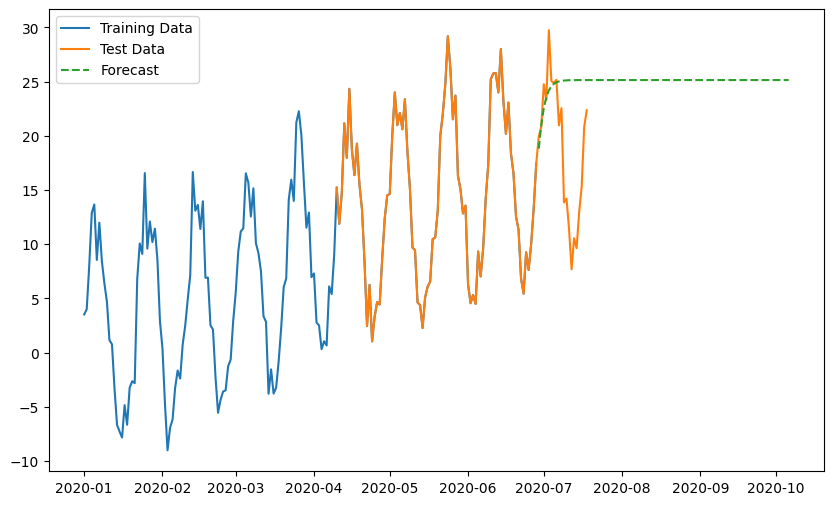

2020-06-29    18.812386
2020-06-30    20.979199
2020-07-01    22.559576
2020-07-02    23.568835
2020-07-03    24.188925
                ...    
2020-10-02    25.137814
2020-10-03    25.137814
2020-10-04    25.137814
2020-10-05    25.137814
2020-10-06    25.137814
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


In [8]:
# 7. Fit the ARIMA Model



# Split the data into training and testing sets
train, test=timeSeries[:180], timeSeries[100:]

# Fit ARIMA model
model=ARIMA(train, order=(2,1,2) )
fit=model.fit()
# Generate forecast
forecast=fit.forecast(steps=len(test))

plt.figure(figsize=(10,6))
plt.plot(train, label="Training Data")
plt.plot(test, label="Test Data")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.legend()
plt.show()

# Print forecast values

print(forecast)



# Data from Yahoo Stock API

Step1: Loading and Preprocessing Data:

Step2: Load the historical stock price data for Apple using yfinance.
Check for missing values and handle them appropriately.
Optionally, resample the data to a lower frequency if needed (e.g., monthly or quarterly).
Calculating Moving Averages:

Step 3: Calculate short-term and long-term moving averages to identify trends.
Short-term moving averages (e.g., 20-day) are sensitive to short-term price movements, while long-term moving averages (e.g., 50-day or 200-day) smooth out fluctuations to identify longer-term trends.
Identifying Trends:

Step 4: Plot the original stock price data along with the moving averages to visually identify trends.
Look for crossovers between short-term and long-term moving averages, which can indicate potential changes in trend direction (e.g., a "golden cross" when the short-term moving average crosses above the long-term moving average, indicating a bullish trend).
Forecasting Future Prices:

Use time-series forecasting techniques such as ARIMA (AutoRegressive Integrated Moving Average) or Prophet to forecast future stock prices.
Split the data into training and testing sets.
Train the forecasting model on the training data and evaluate its performance on the testing data.
Generate forecasts for future time periods based on the trained model.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


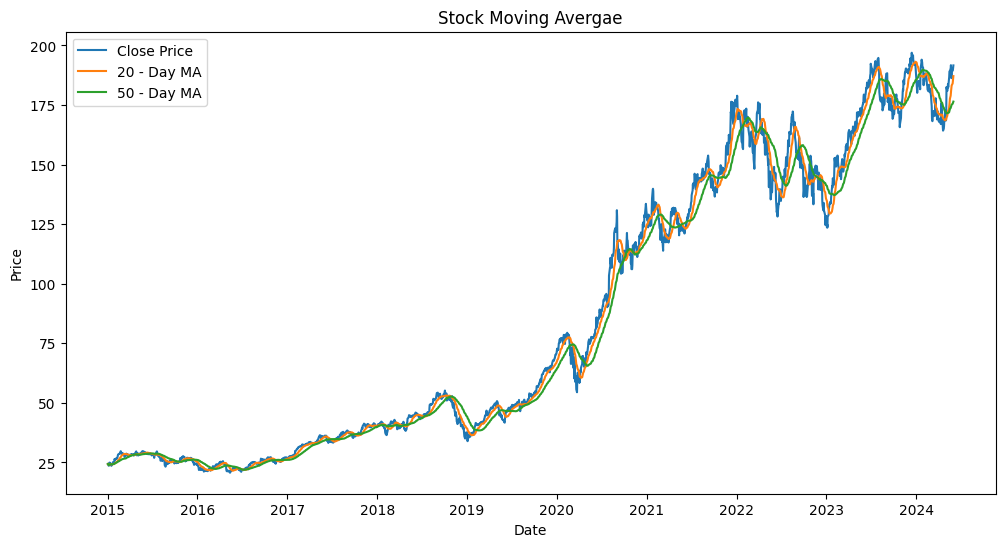

Results of Moving Average:
Price            Close     shortMA      longMA
Ticker            AAPL                        
Date                                          
2024-05-24  189.343628  183.190885  175.146538
2024-05-28  189.353592  184.024335  175.497435
2024-05-29  189.652603  185.030489  175.832415
2024-05-30  190.649246  186.137734  176.140351
2024-05-31  191.606033  187.107195  176.415865


In [9]:
#import packages
import yfinance as yf
from bokeh.plotting import figure, output_file, show

# Download stock data from Yahoo Finance
stockData=yf.download("AAPL", start="2015-01-01", end="2024-06-01")

# Step 1: Loading and Preprocessing Data
stockData.dropna(inplace=True)

# Step 2: Calculating Moving Averages
shortTerm=20
longTerm=50

# Calculate short-term and long-term moving averages
stockData["shortMA"]=stockData["Close"].rolling(window=shortTerm, min_periods=1).mean()
stockData["longMA"]=stockData["Close"].rolling(window=longTerm, min_periods=1).mean()

# Step 3: Identifying Trends
plt.figure(figsize=(12, 6))
plt.plot(stockData.index, stockData["Close"], label="Close Price")
plt.plot(stockData.index, stockData["shortMA"], label=f'{shortTerm} - Day MA')
plt.plot(stockData.index, stockData["longMA"], label=f'{longTerm} - Day MA')
plt.title("Stock Moving Avergae")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Display the results of moving averages

print("Results of Moving Average:")
print(stockData[["Close", "shortMA", "longMA"]].tail())



In [1]:
# import packages

# Create a scatter plot using Bokeh

# Step 1: Loading and Preprocessing Data

# Drop any missing values


# Step 2: Calculating Moving Averages


# Calculate short-term and long-term moving averages

# Step 3: Identifying Trends


# Step 4: Forecasting Future Prices (Not Implemented)
# This step involves more advanced time-series forecasting techniques and is not included in this code snippet.

# Display the results of moving averages


In this code:

We split the data into training and testing sets, with 80% of the data used for training and 20% for testing.
We fit an ARIMA model to the training data using an order of (5, 1, 0), where (p, d, q) are the AR, I, and MA parameters, respectively.
We make predictions for the test set using the fitted model.
We calculate the Root Mean Squared Error (RMSE) to evaluate the model's performance.
Finally, we plot the original training and test data along with the predicted values.


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index 

Root Mean Squared Error (RMSE): 90.43742642775253


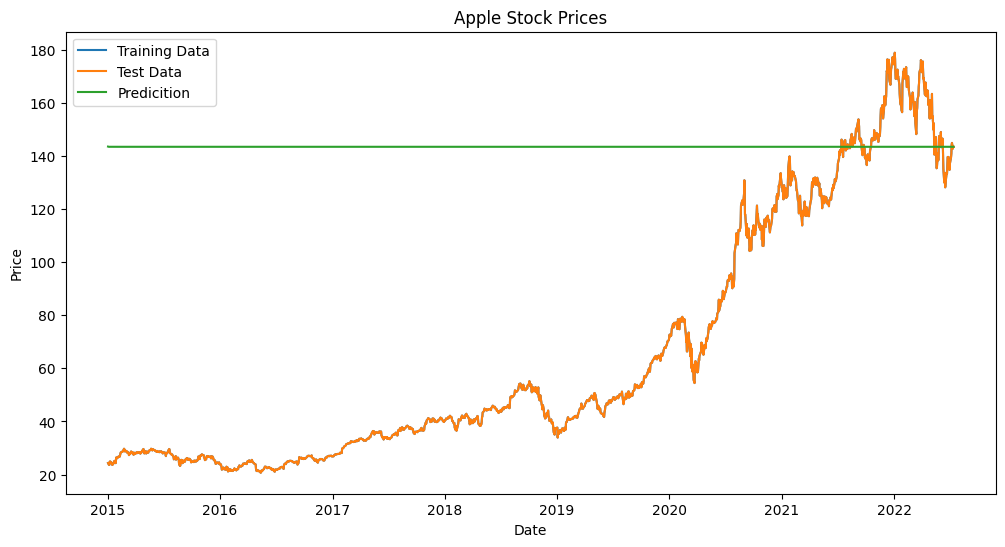

In [10]:
# import packages

from sklearn.metrics import mean_squared_error

# Load the historical stock price data for Apple
# Download stock data from Yahoo Finance
stockData=yf.download("AAPL", start="2015-01-01", end="2024-06-01")

# Step 1: Loading and Preprocessing Data
stockData.dropna(inplace=True)

# Split data into train and test sets
trainData=stockData["Close"].iloc[:int(0.8*len(stockData))]
testData=stockData["Close"].iloc[:int(0.8*len(stockData))]

# Fit ARIMA model
model=ARIMA(trainData, order=(5, 1, 0))
fitModel=model.fit()

# Make predictions
prediction=fitModel.forecast(steps=len(testData))

# Calculate RMSE
mse=mean_squared_error(testData, prediction)
rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot results

plt.figure(figsize=(12,6))
plt.plot(trainData.index, trainData, label="Training Data")
plt.plot(testData.index, testData, label="Test Data")
plt.plot(testData.index, prediction, label="Predicition")

plt.title("Apple Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()



ARIMA, which stands for AutoRegressive Integrated Moving Average, is a popular and powerful time-series forecasting model used in statistics and econometrics. It combines the concepts of autoregression (AR), differencing (I for integrated), and moving average (MA) into one flexible framework.

Here's a breakdown of each component of ARIMA:

1. **AutoRegressive (AR)**: The autoregressive component refers to the use of past values of the forecasted variable to predict future values. In an AR(p) model, the current value of the variable is modeled as a linear combination of its previous values, up to lag p.

2. **Integrated (I)**: The integrated component refers to differencing the time series data to make it stationary, i.e., removing trends and seasonality. This is important because many time series models, including ARIMA, assume that the data are stationary. The order of differencing, denoted as d, represents the number of times the data are differenced until stationarity is achieved.

3. **Moving Average (MA)**: The moving average component models the relationship between the forecasted variable and a linear combination of past forecast errors. In an MA(q) model, the current value of the variable is modeled as a linear combination of past forecast errors, up to lag q.

The general notation for an ARIMA model is ARIMA(p, d, q), where:
- p is the order of the autoregressive component.
- d is the degree of differencing.
- q is the order of the moving average component.

ARIMA models are widely used for time-series forecasting in various fields, including finance, economics, and weather forecasting. They are particularly useful for modeling and predicting data with trends and seasonality. Additionally, ARIMA models can be extended and modified to handle more complex time-series patterns, such as seasonal ARIMA (SARIMA) for seasonal data and ARIMA with exogenous variables (ARIMAX) for incorporating external factors into the forecasting process.